## Context

* For this project, you will take part in a Kaggle competition based on tabular data. The goal is to design a machine learning algorithm that, given information on a particular concertgoer experience, can automatically classify the enjoyment of that concertgoer to that concert. In this classification problem, we have 4 classes. The training dataset consists of 170,000 training examples and the testing dataset contains 30,000 test examples.

* Each training rows contains a unique ID, 18 attributes and 1 target containing the class
that needs to be predicted. You will be evaluated on the test private leaderboard mean
F1-Score.

## Instructions

* To participate in the competition, you must provide a list of predicted outputs for the
instances on the Kaggle website. To solve the problem you are encouraged to use any
classification methods you can think off, presented in the course or otherwise. Looking
into creative way to create new features from those provided may prove especially usefull
in this competition.

* The goal of this competition is to classify a particular concert experience in one of four classes: 
1. Worst Concert Ever
2. Did Not Enjoy
3. Enjoyed
4. Best Concert Ever

* To perform this task you will be given information on the band, the venue, as well as the specific concertgoers.
 
* The dataset contains information on the specific concert, the specific band, and the specific concertgoers. It is to be noted that all three of those are unchanged across all of the training data and test data. Any conclusions on the specific characteristics of a band, concert, or concertgoers will also extend to the test set.

* Unfortunately, the data-gathering step was not impeccable. One can expect some of the training attributes not always to reflect the underlying reality. However, the "Concert Experience" column has been verified and is 100% accurate.

In [212]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load data
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [213]:
train_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin,Concert Enjoyment
0,ConcertExperience_180106,Teenage Crazy Blue Knickers,Indie/Alt Rock,United States of America (USA),1976.0,900.0,2980.0,False,False,NaN,0.330843,-0.958408,-0.943548,-1.636806,29.0,concert_goer_1985,140.0,Paraguay,Did Not Enjoy
1,ConcertExperience_146268,Beyond Devon,Pop Music,United States of America (USA),1968.0,731.0,54.0,True,False,True,-2.069449,0.017777,-1.910675,0.610265,43.0,concert_goer_1874,158.0,United Kingdom (UK),Enjoyed
2,ConcertExperience_128743,Ron Talent,Rock n Roll,Canada,1955.0,NaN,162754.0,False,False,True,-0.484268,1.968772,-0.064167,-1.260871,68.0,concert_goer_442,159.0,United States of America (USA),Did Not Enjoy
3,ConcertExperience_140839,Devon Revival,RnB,United States of America (USA),1992.0,704.0,8103.0,False,True,False,-0.858054,1.022827,-0.348389,-1.147251,17.0,concert_goer_1149,150.0,Canada,Worst Concert Ever
4,ConcertExperience_19149,Beyond Devon,Pop Music,United States of America (USA),1968.0,95.0,54.0,False,False,False,-0.793029,-1.166528,-0.043766,0.969661,59.0,concert_goer_930,166.0,United Kingdom (UK),Did Not Enjoy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,ConcertExperience_14055,Crazy Joystick Cult,RnB,Canada,1985.0,70.0,162754.0,True,False,False,-0.095021,0.175175,0.914245,0.357359,50.0,concert_goer_707,180.0,United States of America (USA),Did Not Enjoy
169996,ConcertExperience_192792,Crazy Joystick Cult,RnB,Canada,1985.0,963.0,54.0,False,False,False,-0.733719,-0.285776,-0.323312,0.641180,71.0,concert_goer_1373,143.0,Bulgaria,Worst Concert Ever
169997,ConcertExperience_152942,"Why Frogs, Why?",Heavy Metal,Canada,2005.0,764.0,54.0,False,False,False,0.744969,-0.965547,1.020598,1.027389,27.0,concert_goer_1286,176.0,Canada,Did Not Enjoy
169998,ConcertExperience_138957,Twilight of the Joystick Gods,Hip Hop/Rap,United States of America (USA),1995.0,694.0,22026.0,False,True,True,0.821976,0.351411,0.175762,1.455654,39.0,concert_goer_1845,176.0,Canada,Did Not Enjoy


In [214]:
test_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin
0,ConcertExperience_70055,The Crazy Heroes of Devon,Rock n Roll,United States of America (USA),1980.0,350.0,2980.0,True,False,True,1.065107,0.057660,0.249639,-0.933976,74.0,concert_goer_1587,165.0,United States of America (USA)
1,ConcertExperience_34799,Joystick for the Jockies,Hip Hop/Rap,United States of America (USA),2014.0,173.0,8103.0,True,True,False,-0.886947,0.801365,0.525624,0.176655,29.0,concert_goer_293,151.0,Kenya
2,ConcertExperience_100410,Puddle of Joystick,Rock n Roll,Canada,2010.0,502.0,2980.0,True,True,False,0.744700,-0.797531,-0.034166,-0.226052,27.0,concert_goer_1068,146.0,Canada
3,ConcertExperience_106446,Flight of the Knickers,NaN,Canada,2014.0,532.0,22026.0,True,False,False,-0.134180,-0.361512,0.969404,-2.341205,38.0,concert_goer_1315,183.0,United States of America (USA)
4,ConcertExperience_127249,Devon Revival,RnB,United States of America (USA),1992.0,636.0,2980.0,False,False,False,1.407366,-0.084155,-0.673233,1.733714,21.0,concert_goer_1777,177.0,Fiji
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ConcertExperience_82288,Joystick of the Big Knickers,Hip Hop/Rap,United States of America (USA),1979.0,411.0,2980.0,True,False,False,-0.421714,-1.549670,-0.351770,0.132489,42.0,concert_goer_1710,178.0,United States of America (USA)
29996,ConcertExperience_27139,Big Division,Hip Hop/Rap,United States of America (USA),1978.0,135.0,8103.0,True,False,False,0.615087,-0.047092,0.339228,0.820159,37.0,concert_goer_1758,186.0,Canada
29997,ConcertExperience_197434,Crazyplay,Pop Music,United States of America (USA),1995.0,987.0,8103.0,False,False,True,-1.396551,-0.508627,-1.692584,1.640931,45.0,concert_goer_1481,158.0,Greece
29998,ConcertExperience_166029,Lord of the Crazy Frogs,RnB,United States of America (USA),1968.0,830.0,8103.0,False,True,False,0.168073,-0.785460,0.898273,1.608389,36.0,concert_goer_1461,170.0,United Kingdom (UK)


In [215]:
train_data.nunique()

Id                                170000
Band Name                             54
Band Genre                             8
Band Country of Origin                 4
Band Debut                            34
Concert ID                          1000
Concert Attendance                    18
Inside Venue                           2
Rain                                   2
Seated                                 2
Personnality Trait 1                2000
Personnality Trait 2                2163
Personnality Trait 3                2205
Personnality Trait 4                2000
Concert Goer Age                      61
Concert Goer ID                     2000
Height (cm)                           51
Concert Goer Country of Origin       152
Concert Enjoyment                      4
dtype: int64

In [216]:
test_data.nunique()

Id                                30000
Band Name                            54
Band Genre                            8
Band Country of Origin                4
Band Debut                           34
Concert ID                         1000
Concert Attendance                   18
Inside Venue                          2
Rain                                  2
Seated                                2
Personnality Trait 1               2000
Personnality Trait 2               2037
Personnality Trait 3               2043
Personnality Trait 4               2000
Concert Goer Age                     61
Concert Goer ID                    2000
Height (cm)                          51
Concert Goer Country of Origin      152
dtype: int64

In [217]:
# Observe correlation between personnalities

train_data[['Personnality Trait 1', 'Personnality Trait 2', 'Personnality Trait 3', 'Personnality Trait 4']].corr()


,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4
Personnality Trait 1,1.000000,0.005117,-0.017076,-0.012334
Personnality Trait 2,0.005117,1.000000,-0.001677,0.002682
Personnality Trait 3,-0.017076,-0.001677,1.000000,0.027111
Personnality Trait 4,-0.012334,0.002682,0.027111,1.000000


In [218]:
# Convert "Insert Band Name" "Insert Band Genre" "Insert Band Country of Origin" to NaN

train_data = train_data.replace({'Insert Band Name':np.nan, 'Insert Band Genre':np.nan, 'Insert Band Country of Origin':np.nan})
test_data = test_data.replace({'Insert Band Name':np.nan, 'Insert Band Genre':np.nan, 'Insert Band Country of Origin':np.nan})

In [219]:
# remove nan value from dataframe
train_data = train_data.dropna()
# test_data = test_data.dropna()


'''
train_data = train_data[train_data['Band Genre'] != 'Insert Band Genre']
train_data = train_data[train_data['Band Country of Origin'] != 'Insert Band Country of Origin']
train_data = train_data[train_data['Band Name'] != 'Insert Band Name']


test_data = test_data[test_data['Band Genre'] != 'Insert Band Genre']
test_data = test_data[test_data['Band Country of Origin'] != 'Insert Band Country of Origin']
test_data = test_data[test_data['Band Name'] != 'Insert Band Name']
'''


genre_dictionary = dict(zip(train_data['Band Genre'].unique(), range(len(train_data['Band Genre'].unique()))))
train_data = train_data.replace({'Band Genre':genre_dictionary})
test_data = test_data.replace({'Band Genre':genre_dictionary})

countries_dictionary = dict(zip(train_data['Band Country of Origin'].unique(), range(len(train_data['Band Country of Origin'].unique()))))
train_data = train_data.replace({'Band Country of Origin':countries_dictionary})
test_data = test_data.replace({'Band Country of Origin':countries_dictionary})

names_dictionary = dict(zip(train_data['Band Name'].unique(), range(len(train_data['Band Name'].unique()))))
train_data = train_data.replace({'Band Name':names_dictionary})
test_data = test_data.replace({'Band Name':names_dictionary})

concert_goer_country_dictionary = dict(zip(train_data['Concert Goer Country of Origin'].unique(), range(len(train_data['Concert Goer Country of Origin'].unique()))))
train_data = train_data.replace({'Concert Goer Country of Origin':concert_goer_country_dictionary})
test_data = test_data.replace({'Concert Goer Country of Origin':concert_goer_country_dictionary})



concert_goer_ID_dictionary = dict(zip(train_data['Concert Goer ID'].unique(), range(len(train_data['Concert Goer ID'].unique()))))
train_data = train_data.replace({'Concert Goer ID':concert_goer_ID_dictionary})
test_data = test_data.replace({'Concert Goer ID':concert_goer_ID_dictionary})


enjoyment_dictionary = {"Worst Concert Ever":0, "Did Not Enjoy":1, "Enjoyed":2, "Best Concert Ever":3}
train_data = train_data.replace({'Concert Enjoyment':enjoyment_dictionary})

# Remove "ConcertExperience" in Id column
train_data['Id'] = train_data['Id'].str.replace('ConcertExperience_', '')
train_data['Id'] = train_data['Id'].astype(int)
test_data['Id'] = test_data['Id'].str.replace('ConcertExperience_', '')
test_data['Id'] = test_data['Id'].astype(int)


In [220]:
# Convert all false value to 0 and all true value to 1
train_data = train_data.replace({False: 0, True: 1})
test_data = test_data.replace({False: 0, True: 1})

In [221]:
train_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin,Concert Enjoyment
1,146268,0,0,0,1968.0,731.0,54.0,1,0,1,-2.069449,0.017777,-1.910675,0.610265,43.0,0,158.0,0,2
3,140839,1,1,0,1992.0,704.0,8103.0,0,1,0,-0.858054,1.022827,-0.348389,-1.147251,17.0,1,150.0,1,0
4,19149,0,0,0,1968.0,95.0,54.0,0,0,0,-0.793029,-1.166528,-0.043766,0.969661,59.0,2,166.0,0,1
5,125567,2,0,1,1998.0,627.0,540000.0,0,0,1,0.091389,-0.691694,0.603638,0.500926,43.0,3,166.0,1,3
7,82419,3,2,0,1980.0,412.0,54.0,1,0,0,0.755175,1.753481,0.942377,-0.657241,67.0,4,171.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,14055,17,1,1,1985.0,70.0,162754.0,1,0,0,-0.095021,0.175175,0.914245,0.357359,50.0,545,180.0,4,1
169996,192792,17,1,1,1985.0,963.0,54.0,0,0,0,-0.733719,-0.285776,-0.323312,0.641180,71.0,1817,143.0,15,0
169997,152942,15,5,1,2005.0,764.0,54.0,0,0,0,0.744969,-0.965547,1.020598,1.027389,27.0,141,176.0,1,1
169998,138957,16,3,0,1995.0,694.0,22026.0,0,1,1,0.821976,0.351411,0.175762,1.455654,39.0,646,176.0,1,1


In [222]:
train_data.describe()

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin,Concert Enjoyment
count,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000,1.556130e+05,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000
mean,99986.368722,25.726148,2.601152,0.380116,1985.895684,499.434430,2.695900e+05,0.495029,0.199019,0.498512,0.029857,-9.312488,-0.017499,0.002708,46.971056,995.864716,164.664148,11.579534,1.500357
std,57694.691872,15.582279,1.702750,0.601425,16.371499,288.473212,1.638581e+07,0.499977,0.399264,0.499999,0.991596,3200.736056,1.005046,1.005983,17.463256,577.148500,14.366261,27.989285,0.806088
min,0.000000,0.000000,0.000000,0.000000,1955.000000,0.000000,5.400000e+01,0.000000,0.000000,0.000000,-3.124408,-293861.500146,-3.275108,-3.287787,16.000000,0.000000,140.000000,0.000000,0.000000
25%,50016.000000,12.000000,1.000000,0.000000,1976.000000,250.000000,4.030000e+02,0.000000,0.000000,0.000000,-0.638873,-0.689943,-0.711015,-0.698374,32.000000,496.000000,152.000000,1.000000,1.000000
50%,100064.000000,25.000000,3.000000,0.000000,1988.000000,500.000000,2.980000e+03,0.000000,0.000000,0.000000,0.022664,-0.021836,0.007932,0.014184,47.000000,997.000000,164.000000,1.000000,2.000000
75%,149961.000000,39.000000,4.000000,1.000000,1998.000000,749.000000,2.202600e+04,1.000000,0.000000,1.000000,0.697311,0.648032,0.680300,0.697340,63.000000,1495.000000,177.000000,4.000000,2.000000
max,199999.000000,52.000000,6.000000,2.000000,2014.000000,999.000000,1.627540e+09,1.000000,1.000000,1.000000,3.628828,325834.016795,3.308810,3.830923,76.000000,1999.000000,190.000000,151.000000,3.000000


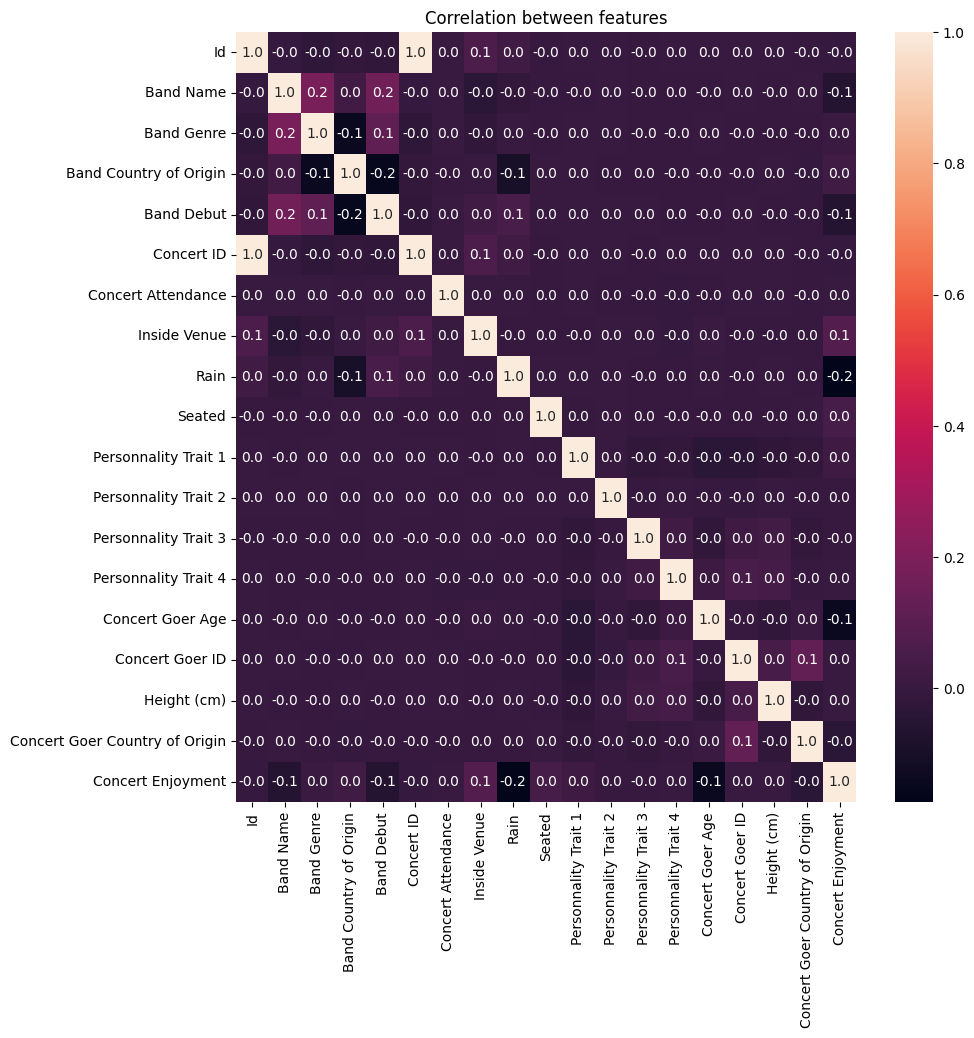

In [223]:
# Get correlation between all columns and visualize it in a heatmap
import seaborn as sns

corr = train_data.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation between features')
sns.heatmap(corr, annot=True, fmt='.1f')
plt.show()

In [224]:
def d_normalize(df):
    df['Band Debut'] = (df['Band Debut'] - df['Band Debut'].mean()) / df['Band Debut'].std()
    df['Concert ID'] = (df['Concert ID'] - df['Concert ID'].mean()) / df['Concert ID'].std()
    df['Concert Attendance'] = (df['Concert Attendance'] - df['Concert Attendance'].mean()) / df['Concert Attendance'].std()
    df['Personnality Trait 1'] = (df['Personnality Trait 1'] - df['Personnality Trait 1'].mean()) / df['Personnality Trait 1'].std()
    df['Personnality Trait 2'] = (df['Personnality Trait 2'] - df['Personnality Trait 2'].mean()) / df['Personnality Trait 2'].std()
    df['Personnality Trait 3'] = (df['Personnality Trait 3'] - df['Personnality Trait 3'].mean()) / df['Personnality Trait 3'].std()
    df['Personnality Trait 4'] = (df['Personnality Trait 4'] - df['Personnality Trait 4'].mean()) / df['Personnality Trait 4'].std()
    df['Concert Goer Age'] = (df['Concert Goer Age'] - df['Concert Goer Age'].mean()) / df['Concert Goer Age'].std()
    df['Concert Goer ID'] = (df['Concert Goer ID'] - df['Concert Goer ID'].mean()) / df['Concert Goer ID'].std()
    df['Height (cm)'] = (df['Height (cm)'] - df['Height (cm)'].mean()) / df['Height (cm)'].std()
    return df

In [225]:
# Convert to numpy array
train_data_np = train_data.to_numpy(dtype = np.float64)
test_data_np = test_data.to_numpy(dtype = np.float64)

In [226]:
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

# train model using "Concert Enjoyment" column as output
X = train_data_np[:,:-1]
# output is "Concert Enjoyment" column
y = train_data_np[:,-1]

# Process test data
val_size = 0.2
seed = 9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=val_size, random_state=seed)

### Normalize "Band Debut", "Concert ID", "Concert Attendance", "Personnality Trait 1", "Personnality Trait 2", "Personnality Trait 3", "Personnality Trait 4", "Concert Goer Age" "Concert Goer ID", "Height (cm)"

In [229]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6635285801497285

In [230]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6708222215082094

In [231]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=1)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6708222215082094

In [232]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.8)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6701474793561032

In [233]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.7)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6720431834977348

In [235]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6722359669697652

In [236]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.5)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6716897471323459

# Model selection

[0.01778647 0.12713481 0.11433895 0.12318145 0.08374479 0.01845542
 0.01786639 0.14928068 0.12430436 0.08804409 0.0102362  0.01003063
 0.01289929 0.00981774 0.04020634 0.00999649 0.00981484 0.03286099]


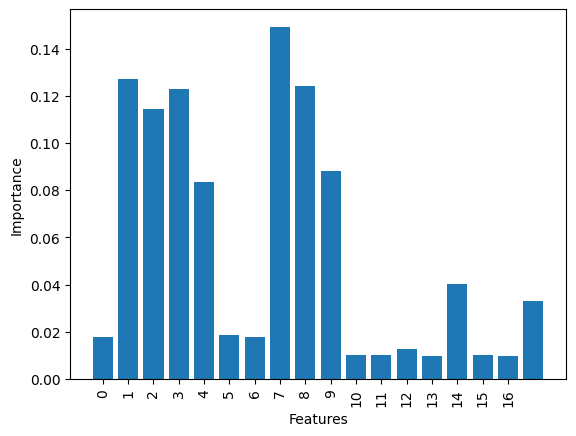

In [238]:
print(clf.feature_importances_)
feature_importance = clf.feature_importances_

# plot feature importance
# xticks every 1
from matplotlib import pyplot
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
# 1 tick at every bar
plt.xticks(np.arange(0, 17, 1))
pyplot.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
pyplot.show()

In [241]:
# Get the index of the least important feature and drop it
idx = np.where(feature_importance == min(feature_importance))
X_train_1 = np.delete(X_train, idx, axis=1)
X_test_1 = np.delete(X_test, idx, axis=1)

test_data_np_1 = np.delete(test_data_np, idx, axis=1)
feature_importance = np.delete(feature_importance, idx)
clf_1 = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf_1.fit(X_train_1, y_train)
f1_score(y_test, clf_1.predict(X_test_1), average='micro')

0.6739067570606947

In [242]:
# Get the index of the least important feature and drop it
idx = np.where(feature_importance == min(feature_importance))
X_train_2 = np.delete(X_train_1, idx, axis=1)
X_test_2 = np.delete(X_test_1, idx, axis=1)

test_data_np_2 = np.delete(test_data_np_1, idx, axis=1)
feature_importance = np.delete(feature_importance, idx)

clf_2 = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf_2.fit(X_train_2, y_train)
f1_score(y_test, clf_2.predict(X_test_2), average='micro')

0.6721717058124217

In [243]:
# Get the index of the least important feature and drop it
idx = np.where(feature_importance == min(feature_importance))
X_train_3 = np.delete(X_train_2, idx, axis=1)
X_test_3 = np.delete(X_test_2, idx, axis=1)

test_data_np_3 = np.delete(test_data_np_2, idx, axis=1)
feature_importance = np.delete(feature_importance, idx)

clf_3 = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf_3.fit(X_train_3, y_train)
f1_score(y_test, clf_3.predict(X_test_3), average='micro')

0.6734569289592905

In [244]:
# Get the index of the least important feature and drop it
idx = np.where(feature_importance == min(feature_importance))
X_train_4 = np.delete(X_train_3, idx, axis=1)
X_test_4 = np.delete(X_test_3, idx, axis=1)

test_data_np_4 = np.delete(test_data_np_3, idx, axis=1)
feature_importance = np.delete(feature_importance, idx)

clf_4 = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf_4.fit(X_train_4, y_train)
f1_score(y_test, clf_4.predict(X_test_4), average='micro')

0.6724930115991389

In [245]:
# Get the index of the least important feature and drop it
idx = np.where(feature_importance == min(feature_importance))
X_train_5 = np.delete(X_train_4, idx, axis=1)
X_test_5 = np.delete(X_test_4, idx, axis=1)

test_data_np_5 = np.delete(test_data_np_4, idx, axis=1)
feature_importance = np.delete(feature_importance, idx)

clf_5 = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf_5.fit(X_train_5, y_train)
f1_score(y_test, clf_5.predict(X_test_5), average='micro')

0.6631751437843395

In [ ]:
feature_importance

array([0.0191594 , 0.12968221, 0.10829692, 0.13273063, 0.07986314,
       0.01759029, 0.14482088, 0.1347176 , 0.07959795, 0.01487757,
       0.03928966, 0.04325046], dtype=float32)

## Test set prediction

In [255]:
best_model = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.8)
best_model.fit(X_train_3, y_train)
f1_score(y_test, best_model.predict(X_test_3), average='micro')

0.6734890595379622

In [256]:
best_model = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.7)
best_model.fit(X_train_3, y_train)
f1_score(y_test, best_model.predict(X_test_3), average='micro')

0.6719789223403914

In [257]:
best_model = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.9)
best_model.fit(X_train_3, y_train)
f1_score(y_test, best_model.predict(X_test_3), average='micro')

0.6737782347460077

In [258]:
best_model = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=1)
best_model.fit(X_train_3, y_train)
f1_score(y_test, best_model.predict(X_test_3), average='micro')

0.6734569289592905

In [259]:
best_model = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.6)
best_model.fit(X_train_3, y_train)
f1_score(y_test, best_model.predict(X_test_3), average='micro')

0.6729749702792147

In [260]:
best_model = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.5)
best_model.fit(X_train_3, y_train)
f1_score(y_test, best_model.predict(X_test_3), average='micro')

0.6705651768788355

### The very best

In [264]:
best_model = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.9)
best_model.fit(X_train_3, y_train)
f1_score(y_test, best_model.predict(X_test_3), average='micro')

0.6737782347460077

In [265]:
best_model.get_params()

{'objective': 'multi:softmax',
 'use_label_encoder': None,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 5,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 1500,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 0.9,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'num_class': 4}

In [266]:
best_y_pred = best_model.predict(test_data_np_3)
best_y_pred

array([3, 2, 2, ..., 2, 0, 1])

In [267]:
len(test_data_np)

30000

In [268]:
# Convert back y_pred to the original label and save it into submission.csv
y_final_pred = pd.DataFrame(best_y_pred, columns = ['Predicted'])

y_final_pred['Predicted'] = y_final_pred['Predicted'].map({0: 'Worst Concert Ever', 1: 'Did Not Enjoy', 2: 'Enjoyed', 3: 'Best Concert Ever'})
# insert column 'Id' to the first column
y_final_pred.insert(0, 'Id', range(1, 1 + len(y_final_pred)))

first_y_test = pd.read_csv('./data/test.csv')
y_final_pred['Id'] = first_y_test['Id']

# save the result to submission.csv
y_final_pred.to_csv('submission2.csv', index = False)

# analyze the result
y_final_pred['Predicted'].value_counts() / y_final_pred.shape[0]

Enjoyed               0.442267
Did Not Enjoy         0.437833
Worst Concert Ever    0.066433
Best Concert Ever     0.053467
Name: Predicted, dtype: float64

In [269]:
y_final_pred['Predicted'].value_counts().sum()

30000

In [270]:
analysis = pd.read_csv('./data/train.csv')
analysis['Concert Enjoyment'].value_counts() / analysis.shape[0]

Enjoyed               0.400153
Did Not Enjoy         0.399676
Best Concert Ever     0.100159
Worst Concert Ever    0.100012
Name: Concert Enjoyment, dtype: float64